In [1]:
#Vectorised gradient descent on batches of Mnist dataset

In [2]:
'''
Importing Libraries
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def load_data():
    '''
    Extracting training and testing data
    '''
    train_data = pd.read_csv(r'L:\Starting Neural Network\MNIST classification\mnist_train.csv', header=None)
    test_data = pd.read_csv(r'L:\Starting Neural Network\MNIST classification\mnist_test.csv', header=None)
    train_data1=np.array(train_data)
    test_data1=np.array(test_data)
    ''' training data '''
    train_image=train_data1[:,1:]
    train_label=train_data1[:,0].reshape(len(train_data1),1)
    ''' testing data '''
    test_image=test_data1[:,1:]
    test_label=test_data1[:,0].reshape(len(test_data1),1)
    ''' HOT-ENCODING training and testing labels'''
    train_label_updated=hot_encode(train_label,10)
    test_label_updated=hot_encode(test_label,10)
    
    ''' Normalizing image pixels '''
    train_image=train_image/255
    ''' returning '''
    return train_image, train_label_updated, test_image, test_label_updated





In [4]:
def hot_encode(label,limit):
    '''
    Function to hot encode the labels in the given limit
    '''
    one_hot_label=np.zeros([len(label),limit])
    j=0
    for i in label:
        one_hot_label[j,i]=1
        j=j+1
    return one_hot_label


In [17]:
class NeuralNetwork():
    
    def __init__(self,train_data):
        # Seed the random number generator
        np.random.seed(1)
        l1_size=np.shape(train_data)[1]
        hidden_l1 = 300
        hidden_l2 = 100
        n_class = 10
        stddev1 = np.sqrt(2/(l1_size+hidden_l1))
        stddev2 = np.sqrt(2/(hidden_l1+hidden_l2))
        stddev3 = np.sqrt(2/(hidden_l2+n_class))
        # Initialize weghts and bases
        self.synaptic_weights1 = np.random.normal(0,stddev1,[l1_size,hidden_l1])
        self.synaptic_weights2 = np.random.normal(0,stddev2,[hidden_l1,hidden_l2])
        self.synaptic_weights3 = np.random.normal(0,stddev3,[hidden_l2,n_class])
        self.bias1 = 1
        self.bias2 = 1
        self.bias3 = 1
        #gradient variables
        self.grad1=0
        self.grad2=0
        self.grad3=0
        self.bias_grad1=0
        self.bias_grad2=0
        self.bias_grad3=0


    def sigmoid(self, x):
        """
        Takes in weighted sum of the inputs and normalizes
        them through between 0 and 1 through a sigmoid function
        """
        return 1 / (1 + np.exp(-x))
    
    
    def sigmoid_derivative(self, x):
        """
        The derivative of the sigmoid function used to
        calculate necessary weight adjustments
        """
        return x * (1 - x)

    def train(self, training_inputs, training_outputs, training_iterations, mode="normal"):
        """
        We train the model through trial and error, adjusting the
        synaptic weights each time to get a better result
        """
        #J=[0]*training_iterations
        drop_prob=0.7
        learning_rate=0.01
        for iteration in range(training_iterations):
            # Pass training set through the neural network
            inputs = training_inputs.astype(float)
            a1 = self.sigmoid(np.dot(inputs, self.synaptic_weights1)+self.bias1)
            a2 = self.sigmoid(np.dot(a1, self.synaptic_weights2)+self.bias2)
            a3 = self.sigmoid(np.dot(a2, self.synaptic_weights3)+self.bias3)
            # Multiply error by input and gradient of the sigmoid function
            # Less confident weights are adjusted more through the nature of the function
            if mode=="normal":
                '''This division is for non-convex function's gradient calculation'''
                # Calculate the error rate
                error = (training_outputs - a3)
                J=np.sum(error,axis=0)
                '''weight gradient'''
                self.grad3 = np.matmul(a2.T, error * self.sigmoid_derivative(a3))
                self.grad2 = np.matmul(np.transpose(a1),np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2))
                upd=np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                self.grad1 = np.matmul(np.transpose(inputs),(self.sigmoid_derivative(a1)*np.matmul(upd,np.transpose(self.synaptic_weights2))))
                '''bias gradient'''
                bias_grad3_tot = error * self.sigmoid_derivative(a3)
                bias_grad2_tot = np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                upd1=np.matmul(error * self.sigmoid_derivative(a3),np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                bias_grad1_tot = (self.sigmoid_derivative(a1)*np.matmul(upd,np.transpose(self.synaptic_weights2)))
                self.bias_grad3 = np.mean(bias_grad3_tot)
                self.bias_grad2 = np.mean(bias_grad2_tot)
                self.bias_grad1 = np.mean(bias_grad1_tot)
            
            else:
                '''This division is for convex function's gradient calculation'''
                cost = (training_outputs*np.log(a3)) + ((1-training_outputs)*np.log(1-a3))
                J=np.mean(np.sum(cost,axis=0))
                error=a3-training_outputs
                self.grad3 = np.matmul(a2.T, error)
                self.grad2 = np.matmul(np.transpose(a1),np.matmul(error,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2))
                upd=np.matmul(error,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                self.grad1 = np.matmul(np.transpose(inputs),(self.sigmoid_derivative(a1)*np.dot(upd,np.transpose(self.synaptic_weights2))))
                '''bias gradient'''
                bias_grad3_tot = error
                bias_grad2_tot = np.matmul(error ,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                upd1=np.matmul(error ,np.transpose(self.synaptic_weights3))*self.sigmoid_derivative(a2)
                bias_grad1_tot = (self.sigmoid_derivative(a1)*np.matmul(upd,np.transpose(self.synaptic_weights2)))
                self.bias_grad3 = np.mean(bias_grad3_tot)
                self.bias_grad2 = np.mean(bias_grad2_tot)
                self.bias_grad1 = np.mean(bias_grad1_tot)
            
            # Adjust synaptic weights
            self.synaptic_weights1 -= self.grad1*learning_rate
            self.synaptic_weights2 -= self.grad2*learning_rate
            self.synaptic_weights3 -= self.grad3*learning_rate
            # Adjust bias
            self.bias1 -= self.bias_grad1*learning_rate
            self.bias2 -= self.bias_grad2*learning_rate
            self.bias3 -= self.bias_grad3*learning_rate
            
        return J

    def think(self, inputs):
        """
        Pass inputs through the neural network to get output
        """
        
        inputs = inputs.astype(float)
        a1 = self.sigmoid(np.dot(inputs, self.synaptic_weights1)+self.bias1)
        a2 = self.sigmoid(np.dot(a1, self.synaptic_weights2)+self.bias2)
        a3 = self.sigmoid(np.dot(a2, self.synaptic_weights3)+self.bias3)
        return (a3)  
    
   

In [11]:
def take_next_batch(train_image,train_label,current_batch_no,batch_size):
    '''
    Function to return images and their labels of certain batch size 
    '''
    
    out_img=train_image[current_batch_no:(current_batch_no + batch_size), : ]
    out_label=train_label[current_batch_no:(current_batch_no + batch_size)]
    current_batch_no += batch_size
    #print(len(out_img))
    return (out_img,out_label,current_batch_no)


Loss in minibatch 0 : -101.27083597982389
Loss in minibatch 1 : -234.63871839187814
Loss in minibatch 2 : -109.15037799744043
Loss in minibatch 3 : -70.88966988995244
Loss in minibatch 4 : -64.95175033311804
Loss in minibatch 5 : -64.7075648910828
Loss in minibatch 6 : -49.66868249611132
Loss in minibatch 7 : -42.90325686411488
Loss in minibatch 8 : -43.16389979694564
Loss in minibatch 9 : -41.39402328192989
Loss in minibatch 10 : -47.75048571177879
Loss in minibatch 11 : -42.4342322695528
Loss in minibatch 12 : -39.22793734610875
Loss in minibatch 13 : -37.22174437134113
Loss in minibatch 14 : -40.273453501969904
Loss in minibatch 15 : -40.34808495782633
Loss in minibatch 16 : -36.58792491783576
Loss in minibatch 17 : -38.29548630539115
Loss in minibatch 18 : -39.96793275646472
Loss in minibatch 19 : -36.03385944494837
Loss in minibatch 20 : -36.552248225034155
Loss in minibatch 21 : -34.13406734789328
Loss in minibatch 22 : -34.62367403023575
Loss in minibatch 23 : -38.95422454731846

Loss in minibatch 192 : -34.10704412469981
Loss in minibatch 193 : -34.255930548767246
Loss in minibatch 194 : -33.80102544549977
Loss in minibatch 195 : -33.227070274491496
Loss in minibatch 196 : -33.47383463837667
Loss in minibatch 197 : -32.85061153438069
Loss in minibatch 198 : -34.07348476731377
Loss in minibatch 199 : -35.39267268511407
Loss in minibatch 200 : -34.27257408851659
Loss in minibatch 201 : -34.365144172589325
Loss in minibatch 202 : -34.03295842522306
Loss in minibatch 203 : -35.69755177380249
Loss in minibatch 204 : -38.13096303732788
Loss in minibatch 205 : -36.595285854255984
Loss in minibatch 206 : -37.47505264584716
Loss in minibatch 207 : -33.53161061045256
Loss in minibatch 208 : -33.726742747469416
Loss in minibatch 209 : -35.05676313238727
Loss in minibatch 210 : -34.48864688815176
Loss in minibatch 211 : -34.912254002457544
Loss in minibatch 212 : -33.70954614431842
Loss in minibatch 213 : -34.0186216942548
Loss in minibatch 214 : -31.716628709204553
Loss 

Loss in minibatch 381 : -14.30250758657343
Loss in minibatch 382 : -15.957627371574512
Loss in minibatch 383 : -16.94064924686997
Loss in minibatch 384 : -14.333081552195353
Loss in minibatch 385 : -17.373688408427956
Loss in minibatch 386 : -15.980662076830834
Loss in minibatch 387 : -14.561293901372096
Loss in minibatch 388 : -13.248858118014121
Loss in minibatch 389 : -14.534601932928712
Loss in minibatch 390 : -12.368963548333875
Loss in minibatch 391 : -14.928713957540756
Loss in minibatch 392 : -15.984211842211062
Loss in minibatch 393 : -17.10648136028002
Loss in minibatch 394 : -19.429473873743785
Loss in minibatch 395 : -16.596931410644885
Loss in minibatch 396 : -15.535616837657567
Loss in minibatch 397 : -16.964587362200156
Loss in minibatch 398 : -16.280449591521084
Loss in minibatch 399 : -17.08349004870083
Loss in minibatch 400 : -14.564700400156815
Loss in minibatch 401 : -13.791067172940297
Loss in minibatch 402 : -13.170506765787522
Loss in minibatch 403 : -13.41845408

Loss in minibatch 571 : -5.856948289906762
Loss in minibatch 572 : -9.002707365612832
Loss in minibatch 573 : -10.707686444884079
Loss in minibatch 574 : -8.618817981376974
Loss in minibatch 575 : -9.64377561659739
Loss in minibatch 576 : -9.788976456982619
Loss in minibatch 577 : -9.681432539764382
Loss in minibatch 578 : -6.455427125956726
Loss in minibatch 579 : -5.868558617066145
Loss in minibatch 580 : -7.932370174984333
Loss in minibatch 581 : -6.66300880242
Loss in minibatch 582 : -4.449760609411544
Loss in minibatch 583 : -5.255956438992913
Loss in minibatch 584 : -6.29685900674991
Loss in minibatch 585 : -7.57448676893213
Loss in minibatch 586 : -6.059735407681825
Loss in minibatch 587 : -7.3066785483964765
Loss in minibatch 588 : -6.469032035779664
Loss in minibatch 589 : -3.1501422117216054
Loss in minibatch 590 : -3.379187212542454
Loss in minibatch 591 : -3.874685066424943
Loss in minibatch 592 : -5.691611914692045
Loss in minibatch 593 : -10.229957472011456
Loss in miniba

Loss in minibatch 164 : -5.582716626351292
Loss in minibatch 165 : -6.52682070676393
Loss in minibatch 166 : -8.370977334798525
Loss in minibatch 167 : -7.897973678176973
Loss in minibatch 168 : -5.616897592384125
Loss in minibatch 169 : -7.806874566788537
Loss in minibatch 170 : -7.296688665781448
Loss in minibatch 171 : -6.887202810820796
Loss in minibatch 172 : -7.448304096727627
Loss in minibatch 173 : -3.5809850185277994
Loss in minibatch 174 : -7.311808511179969
Loss in minibatch 175 : -10.07339475816214
Loss in minibatch 176 : -6.986627705044199
Loss in minibatch 177 : -8.096303113051611
Loss in minibatch 178 : -8.772886498066258
Loss in minibatch 179 : -5.2148581830823115
Loss in minibatch 180 : -4.85615597471089
Loss in minibatch 181 : -3.935019967285549
Loss in minibatch 182 : -5.071762531293929
Loss in minibatch 183 : -4.715689489618366
Loss in minibatch 184 : -6.1894438797888665
Loss in minibatch 185 : -6.506602216425213
Loss in minibatch 186 : -5.507454700949442
Loss in mi

Loss in minibatch 355 : -3.52001947761086
Loss in minibatch 356 : -5.962596005875879
Loss in minibatch 357 : -3.8594678344761264
Loss in minibatch 358 : -3.694130410410865
Loss in minibatch 359 : -4.41187864213163
Loss in minibatch 360 : -5.5257867843467725
Loss in minibatch 361 : -5.734186525462718
Loss in minibatch 362 : -4.379012350148664
Loss in minibatch 363 : -3.834807979493982
Loss in minibatch 364 : -5.047376186235468
Loss in minibatch 365 : -4.201839964057641
Loss in minibatch 366 : -2.5406091638656023
Loss in minibatch 367 : -4.055050526010782
Loss in minibatch 368 : -5.76077473347434
Loss in minibatch 369 : -3.688225667498757
Loss in minibatch 370 : -6.189953404432815
Loss in minibatch 371 : -6.711685901060088
Loss in minibatch 372 : -7.039870988483313
Loss in minibatch 373 : -11.78364324676993
Loss in minibatch 374 : -8.212673413203182
Loss in minibatch 375 : -6.967891889674965
Loss in minibatch 376 : -6.124354440168942
Loss in minibatch 377 : -5.82403392910268
Loss in mini

Loss in minibatch 548 : -6.13499749383133
Loss in minibatch 549 : -7.378994760265184
Loss in minibatch 550 : -4.082624872966422
Loss in minibatch 551 : -4.909054196529179
Loss in minibatch 552 : -3.4252225965138314
Loss in minibatch 553 : -4.580453568094528
Loss in minibatch 554 : -3.647002868489108
Loss in minibatch 555 : -4.438361816743821
Loss in minibatch 556 : -3.7187521796622756
Loss in minibatch 557 : -4.9286980387132795
Loss in minibatch 558 : -3.4253645448943884
Loss in minibatch 559 : -3.4118656834390655
Loss in minibatch 560 : -3.878242918572108
Loss in minibatch 561 : -3.068167865241225
Loss in minibatch 562 : -5.919209008006153
Loss in minibatch 563 : -4.7092665921836625
Loss in minibatch 564 : -7.076925525738716
Loss in minibatch 565 : -3.398142969445525
Loss in minibatch 566 : -4.702200561161681
Loss in minibatch 567 : -3.1734804035593336
Loss in minibatch 568 : -3.8757300447215597
Loss in minibatch 569 : -2.819212517760974
Loss in minibatch 570 : -5.440768602619241
Loss

Loss in minibatch 142 : -5.41071451375649
Loss in minibatch 143 : -7.611236674123704
Loss in minibatch 144 : -3.5863132193841323
Loss in minibatch 145 : -5.894732725834832
Loss in minibatch 146 : -8.392290117969571
Loss in minibatch 147 : -10.927617453418481
Loss in minibatch 148 : -6.396157161919991
Loss in minibatch 149 : -2.6463941055360287
Loss in minibatch 150 : -3.704266757371831
Loss in minibatch 151 : -5.003139199794406
Loss in minibatch 152 : -3.9161634682785285
Loss in minibatch 153 : -2.6030544582391606
Loss in minibatch 154 : -4.2430819224598695
Loss in minibatch 155 : -3.5916817223967015
Loss in minibatch 156 : -2.044706644629074
Loss in minibatch 157 : -7.748370994597799
Loss in minibatch 158 : -6.085317357835008
Loss in minibatch 159 : -5.890534095894326
Loss in minibatch 160 : -5.681128927458238
Loss in minibatch 161 : -4.388348360320011
Loss in minibatch 162 : -3.3278503431527255
Loss in minibatch 163 : -2.7673155574621155
Loss in minibatch 164 : -4.189562080640688
Los

Loss in minibatch 338 : -2.0241589457338276
Loss in minibatch 339 : -1.601253072751419
Loss in minibatch 340 : -3.709505069061869
Loss in minibatch 341 : -2.124960202801288
Loss in minibatch 342 : -1.5686655581443587
Loss in minibatch 343 : -2.05846991035481
Loss in minibatch 344 : -5.808381184415234
Loss in minibatch 345 : -4.248280409722626
Loss in minibatch 346 : -5.526235140717484
Loss in minibatch 347 : -4.6260640001121995
Loss in minibatch 348 : -6.419608578298859
Loss in minibatch 349 : -3.7576995454422417
Loss in minibatch 350 : -3.1820832991920254
Loss in minibatch 351 : -3.7217837938272402
Loss in minibatch 352 : -3.7895605643469237
Loss in minibatch 353 : -2.5749482395710723
Loss in minibatch 354 : -5.735485423265954
Loss in minibatch 355 : -2.107417559348327
Loss in minibatch 356 : -4.226337372905119
Loss in minibatch 357 : -2.7665568610745463
Loss in minibatch 358 : -2.409577991487908
Loss in minibatch 359 : -3.6290624792163975
Loss in minibatch 360 : -4.510230764665069
Lo

Loss in minibatch 532 : -2.3940261745945444
Loss in minibatch 533 : -1.4241993849133163
Loss in minibatch 534 : -2.1680822014053183
Loss in minibatch 535 : -4.663644241260876
Loss in minibatch 536 : -3.9921723325012146
Loss in minibatch 537 : -2.0402038864124847
Loss in minibatch 538 : -3.4384615897478845
Loss in minibatch 539 : -4.839011873513331
Loss in minibatch 540 : -4.11762872248457
Loss in minibatch 541 : -2.4824983054685177
Loss in minibatch 542 : -1.9057173000195555
Loss in minibatch 543 : -2.635389527422561
Loss in minibatch 544 : -2.2690519206629274
Loss in minibatch 545 : -4.760597361645727
Loss in minibatch 546 : -1.538075311835756
Loss in minibatch 547 : -1.6745988031749666
Loss in minibatch 548 : -4.728917609891125
Loss in minibatch 549 : -4.960969703722808
Loss in minibatch 550 : -2.5725772570675485
Loss in minibatch 551 : -4.067635540536075
Loss in minibatch 552 : -2.7415143974695546
Loss in minibatch 553 : -3.5365600077366404
Loss in minibatch 554 : -2.924188776878824

Loss in minibatch 128 : -2.4632850362311176
Loss in minibatch 129 : -3.781093363502321
Loss in minibatch 130 : -6.122864583841937
Loss in minibatch 131 : -5.119172278460033
Loss in minibatch 132 : -1.5493925279811485
Loss in minibatch 133 : -2.704399911744521
Loss in minibatch 134 : -3.1459956987077398
Loss in minibatch 135 : -2.0579158809610485
Loss in minibatch 136 : -4.130883045109028
Loss in minibatch 137 : -4.29099502670204
Loss in minibatch 138 : -3.1323239450636238
Loss in minibatch 139 : -4.994858241912203
Loss in minibatch 140 : -3.834701574746753
Loss in minibatch 141 : -4.026519901175243
Loss in minibatch 142 : -3.7799395879096864
Loss in minibatch 143 : -6.01826665595663
Loss in minibatch 144 : -2.4719862932131327
Loss in minibatch 145 : -4.189951336902427
Loss in minibatch 146 : -4.981296753321626
Loss in minibatch 147 : -7.837065660316637
Loss in minibatch 148 : -4.673766740639442
Loss in minibatch 149 : -1.7159018608710361
Loss in minibatch 150 : -2.9110971491398905
Loss

Loss in minibatch 320 : -3.4595894230371314
Loss in minibatch 321 : -4.884321191925666
Loss in minibatch 322 : -4.3098596700599305
Loss in minibatch 323 : -3.8304225966385586
Loss in minibatch 324 : -5.174892703280168
Loss in minibatch 325 : -2.196959119392031
Loss in minibatch 326 : -3.076179285313698
Loss in minibatch 327 : -3.227020452493368
Loss in minibatch 328 : -3.358116282937009
Loss in minibatch 329 : -1.5933211279319894
Loss in minibatch 330 : -2.667101525731609
Loss in minibatch 331 : -1.1854263998673278
Loss in minibatch 332 : -2.013039612507578
Loss in minibatch 333 : -3.057253027921166
Loss in minibatch 334 : -2.516595808344155
Loss in minibatch 335 : -2.9308194539729495
Loss in minibatch 336 : -2.322029649374193
Loss in minibatch 337 : -3.4823832250487983
Loss in minibatch 338 : -1.4122257321944172
Loss in minibatch 339 : -1.0073705464876042
Loss in minibatch 340 : -2.853298709171145
Loss in minibatch 341 : -1.4598233237251315
Loss in minibatch 342 : -1.0409495397250648


Loss in minibatch 514 : -2.261157339091491
Loss in minibatch 515 : -1.9696806404522136
Loss in minibatch 516 : -2.6761942643101224
Loss in minibatch 517 : -3.4627439967629647
Loss in minibatch 518 : -1.187938412244057
Loss in minibatch 519 : -3.244846816922223
Loss in minibatch 520 : -3.0676098400286085
Loss in minibatch 521 : -4.517845688428717
Loss in minibatch 522 : -2.577692608186843
Loss in minibatch 523 : -2.852751678648914
Loss in minibatch 524 : -2.6974722741546424
Loss in minibatch 525 : -1.7180850641354688
Loss in minibatch 526 : -2.416705897525263
Loss in minibatch 527 : -2.9350278439191113
Loss in minibatch 528 : -3.92296969666925
Loss in minibatch 529 : -7.127707702172081
Loss in minibatch 530 : -2.186330732803048
Loss in minibatch 531 : -2.5640335733006094
Loss in minibatch 532 : -1.9046251593197734
Loss in minibatch 533 : -0.9181683220459338
Loss in minibatch 534 : -1.7250881270467169
Loss in minibatch 535 : -3.4733114974987926
Loss in minibatch 536 : -3.4802607736404396

Loss in minibatch 102 : -8.337571024666058
Loss in minibatch 103 : -4.586930802394912
Loss in minibatch 104 : -1.9807384778272241
Loss in minibatch 105 : -0.685243232703322
Loss in minibatch 106 : -1.411283590995357
Loss in minibatch 107 : -4.180164637322049
Loss in minibatch 108 : -1.9837455406182127
Loss in minibatch 109 : -2.703531255398273
Loss in minibatch 110 : -1.8253861651330463
Loss in minibatch 111 : -1.2576299766306651
Loss in minibatch 112 : -1.9116707378756772
Loss in minibatch 113 : -1.1246635058998438
Loss in minibatch 114 : -1.9838290298167849
Loss in minibatch 115 : -3.7775211185065287
Loss in minibatch 116 : -3.6041471417754862
Loss in minibatch 117 : -3.8709039833632537
Loss in minibatch 118 : -3.1605698543233265
Loss in minibatch 119 : -2.303750851480117
Loss in minibatch 120 : -2.76706432233867
Loss in minibatch 121 : -1.4687762299847162
Loss in minibatch 122 : -2.3424330757471985
Loss in minibatch 123 : -2.907428930993646
Loss in minibatch 124 : -1.705400208206074

Loss in minibatch 290 : -2.8466840427840046
Loss in minibatch 291 : -1.9050018903796815
Loss in minibatch 292 : -2.849751551151262
Loss in minibatch 293 : -3.231743733710458
Loss in minibatch 294 : -1.198588732355802
Loss in minibatch 295 : -2.4805286125961343
Loss in minibatch 296 : -1.2034553843448788
Loss in minibatch 297 : -2.3940730514116315
Loss in minibatch 298 : -2.4293238152101218
Loss in minibatch 299 : -3.045436789250896
Loss in minibatch 300 : -2.792824408312201
Loss in minibatch 301 : -3.9474103649949677
Loss in minibatch 302 : -2.0755645499938358
Loss in minibatch 303 : -1.475739452999055
Loss in minibatch 304 : -2.6185751953379954
Loss in minibatch 305 : -2.173936386639075
Loss in minibatch 306 : -2.6189299688769987
Loss in minibatch 307 : -1.8131005756868936
Loss in minibatch 308 : -2.372381593965055
Loss in minibatch 309 : -2.283923306269618
Loss in minibatch 310 : -1.7702846985548804
Loss in minibatch 311 : -4.592988174676212
Loss in minibatch 312 : -1.992842126644467

Loss in minibatch 480 : -2.4582859932708203
Loss in minibatch 481 : -1.4173279619631187
Loss in minibatch 482 : -1.8204003812094036
Loss in minibatch 483 : -3.53606017730752
Loss in minibatch 484 : -1.276342268425196
Loss in minibatch 485 : -2.437022406166256
Loss in minibatch 486 : -1.5167481219735168
Loss in minibatch 487 : -0.8851315331533577
Loss in minibatch 488 : -0.9951455692554017
Loss in minibatch 489 : -6.397634339491054
Loss in minibatch 490 : -6.643892946150848
Loss in minibatch 491 : -1.7609659746991078
Loss in minibatch 492 : -2.0075902125462206
Loss in minibatch 493 : -1.6792704745840108
Loss in minibatch 494 : -3.119813627160987
Loss in minibatch 495 : -4.683787439133514
Loss in minibatch 496 : -3.833664358178003
Loss in minibatch 497 : -1.228712314425054
Loss in minibatch 498 : -5.371286913070476
Loss in minibatch 499 : -1.890528976431002
Loss in minibatch 500 : -1.9279625475916071
Loss in minibatch 501 : -1.3501985193447372
Loss in minibatch 502 : -3.806983306672997
L

Loss in minibatch 68 : -3.8390363803527556
Loss in minibatch 69 : -2.5597345403295195
Loss in minibatch 70 : -3.4062001481166675
Loss in minibatch 71 : -1.8612485149830988
Loss in minibatch 72 : -3.5195814617917813
Loss in minibatch 73 : -2.547706057644689
Loss in minibatch 74 : -1.339635890486078
Loss in minibatch 75 : -3.0206563148808723
Loss in minibatch 76 : -1.574165271180603
Loss in minibatch 77 : -2.209250592309175
Loss in minibatch 78 : -3.691244967287994
Loss in minibatch 79 : -1.8458602939783724
Loss in minibatch 80 : -1.8164755502178558
Loss in minibatch 81 : -2.245822268208058
Loss in minibatch 82 : -5.163986484267948
Loss in minibatch 83 : -1.4766887177452452
Loss in minibatch 84 : -3.5638560673150366
Loss in minibatch 85 : -0.7352972308931408
Loss in minibatch 86 : -3.122335419254767
Loss in minibatch 87 : -4.971120624139045
Loss in minibatch 88 : -5.286327511416359
Loss in minibatch 89 : -2.614595988994858
Loss in minibatch 90 : -1.6951322612143431
Loss in minibatch 91 :

Loss in minibatch 259 : -1.862108701232766
Loss in minibatch 260 : -0.8669599639470927
Loss in minibatch 261 : -1.174650601693723
Loss in minibatch 262 : -1.372616457876481
Loss in minibatch 263 : -4.182712055711139
Loss in minibatch 264 : -2.6188926408606377
Loss in minibatch 265 : -3.4451955879735805
Loss in minibatch 266 : -2.7457712716455682
Loss in minibatch 267 : -4.755225603614131
Loss in minibatch 268 : -3.785892451516734
Loss in minibatch 269 : -1.0280040747211225
Loss in minibatch 270 : -0.9357005118130515
Loss in minibatch 271 : -4.6305469497532155
Loss in minibatch 272 : -3.070285033997999
Loss in minibatch 273 : -1.2672488725624231
Loss in minibatch 274 : -1.9445866823642626
Loss in minibatch 275 : -2.4757489233985623
Loss in minibatch 276 : -2.7061196030034127
Loss in minibatch 277 : -2.3653588846411777
Loss in minibatch 278 : -1.8697364837461066
Loss in minibatch 279 : -0.6658626219139171
Loss in minibatch 280 : -0.8990804966294329
Loss in minibatch 281 : -1.738050004693

Loss in minibatch 451 : -2.2494842325202256
Loss in minibatch 452 : -1.9894042299305894
Loss in minibatch 453 : -0.7603642196573241
Loss in minibatch 454 : -2.2917773443289606
Loss in minibatch 455 : -3.0301641727125594
Loss in minibatch 456 : -2.43949596305445
Loss in minibatch 457 : -1.6401803532509955
Loss in minibatch 458 : -2.9746973945663058
Loss in minibatch 459 : -2.4842958852324357
Loss in minibatch 460 : -3.2018624209205115
Loss in minibatch 461 : -2.133889388397965
Loss in minibatch 462 : -3.771933699464958
Loss in minibatch 463 : -5.619337975721949
Loss in minibatch 464 : -2.600243429592479
Loss in minibatch 465 : -0.7020744435585003
Loss in minibatch 466 : -0.6903857792046889
Loss in minibatch 467 : -1.6478112282107014
Loss in minibatch 468 : -1.740524309359411
Loss in minibatch 469 : -1.546641485403409
Loss in minibatch 470 : -1.5320118868690185
Loss in minibatch 471 : -0.9953317533582846
Loss in minibatch 472 : -4.237869995663088
Loss in minibatch 473 : -1.71527032697562

Loss in minibatch 45 : -0.556198425148363
Loss in minibatch 46 : -1.8743722302000396
Loss in minibatch 47 : -0.8172965514127467
Loss in minibatch 48 : -0.6668291756852256
Loss in minibatch 49 : -2.6475354643658426
Loss in minibatch 50 : -1.202174068299483
Loss in minibatch 51 : -2.481408834838679
Loss in minibatch 52 : -1.3777329047497435
Loss in minibatch 53 : -1.9488642416391813
Loss in minibatch 54 : -0.5996468153169776
Loss in minibatch 55 : -1.5057964490986406
Loss in minibatch 56 : -1.3408351909166547
Loss in minibatch 57 : -2.8665010178968515
Loss in minibatch 58 : -2.637387729716017
Loss in minibatch 59 : -0.890727787993365
Loss in minibatch 60 : -0.7574407015842832
Loss in minibatch 61 : -0.9789088878249783
Loss in minibatch 62 : -1.2526021478586944
Loss in minibatch 63 : -0.7817456489218377
Loss in minibatch 64 : -3.2134127199584794
Loss in minibatch 65 : -0.5995744770029849
Loss in minibatch 66 : -1.4103294670455333
Loss in minibatch 67 : -0.7114610734785276
Loss in minibatc

Loss in minibatch 240 : -0.7094454903992753
Loss in minibatch 241 : -0.8640975591844317
Loss in minibatch 242 : -2.573954702461617
Loss in minibatch 243 : -0.8978074049224831
Loss in minibatch 244 : -1.4926922898522128
Loss in minibatch 245 : -1.96885464377296
Loss in minibatch 246 : -2.3952325455924672
Loss in minibatch 247 : -2.5841648387983924
Loss in minibatch 248 : -0.8503998344547646
Loss in minibatch 249 : -1.8722157833240771
Loss in minibatch 250 : -1.1190925472272084
Loss in minibatch 251 : -1.9950660809401062
Loss in minibatch 252 : -0.7355784859690745
Loss in minibatch 253 : -1.2228915416954382
Loss in minibatch 254 : -1.1205257211587576
Loss in minibatch 255 : -3.538964360350034
Loss in minibatch 256 : -1.6058889814271307
Loss in minibatch 257 : -1.8408127780918897
Loss in minibatch 258 : -2.1741076381507503
Loss in minibatch 259 : -1.5058720141810262
Loss in minibatch 260 : -0.6891842804548236
Loss in minibatch 261 : -0.9712020580484712
Loss in minibatch 262 : -1.131856789

Loss in minibatch 429 : -2.5367912230819156
Loss in minibatch 430 : -1.882125583707167
Loss in minibatch 431 : -0.747302633712619
Loss in minibatch 432 : -0.9463775959127263
Loss in minibatch 433 : -0.3222967779471266
Loss in minibatch 434 : -1.0237807597605406
Loss in minibatch 435 : -1.7054471488150333
Loss in minibatch 436 : -2.151173977210393
Loss in minibatch 437 : -0.7816399441573316
Loss in minibatch 438 : -1.8389381442691846
Loss in minibatch 439 : -2.020186387551182
Loss in minibatch 440 : -1.1486023255234228
Loss in minibatch 441 : -1.296694478743237
Loss in minibatch 442 : -2.1001080201178937
Loss in minibatch 443 : -1.4497184870666877
Loss in minibatch 444 : -2.5903297598702535
Loss in minibatch 445 : -0.7028246244582228
Loss in minibatch 446 : -1.400943193245333
Loss in minibatch 447 : -0.6283142697355488
Loss in minibatch 448 : -2.047194156386174
Loss in minibatch 449 : -1.2782438266238976
Loss in minibatch 450 : -1.4247694759978915
Loss in minibatch 451 : -2.087709439553

Loss in minibatch 17 : -0.7624221623280241
Loss in minibatch 18 : -0.992613113901076
Loss in minibatch 19 : -1.684091589604887
Loss in minibatch 20 : -1.884951908492265
Loss in minibatch 21 : -0.5542995203429946
Loss in minibatch 22 : -0.74582338690391
Loss in minibatch 23 : -0.2832667725029673
Loss in minibatch 24 : -1.2008916362472846
Loss in minibatch 25 : -0.49229023436188096
Loss in minibatch 26 : -1.7642864672780423
Loss in minibatch 27 : -1.7788033905006961
Loss in minibatch 28 : -0.9572341551189549
Loss in minibatch 29 : -0.9554112338278508
Loss in minibatch 30 : -1.208329206233256
Loss in minibatch 31 : -0.451681890252061
Loss in minibatch 32 : -1.1881833936159503
Loss in minibatch 33 : -0.540738560853169
Loss in minibatch 34 : -0.8139319797253364
Loss in minibatch 35 : -0.9188717975268814
Loss in minibatch 36 : -1.8824012023222767
Loss in minibatch 37 : -0.6630950037113651
Loss in minibatch 38 : -0.8988142664820652
Loss in minibatch 39 : -0.5345015380961499
Loss in minibatch 

Loss in minibatch 207 : -3.4896776352180248
Loss in minibatch 208 : -1.4029027313103186
Loss in minibatch 209 : -1.9728785062819316
Loss in minibatch 210 : -1.8619977906118628
Loss in minibatch 211 : -1.0679384242508014
Loss in minibatch 212 : -0.7008345226044219
Loss in minibatch 213 : -1.0809617783462107
Loss in minibatch 214 : -1.423475426684008
Loss in minibatch 215 : -1.4685352331035828
Loss in minibatch 216 : -2.557167331127237
Loss in minibatch 217 : -1.0636702163964382
Loss in minibatch 218 : -0.6424943325925687
Loss in minibatch 219 : -1.2194931632999915
Loss in minibatch 220 : -0.8729082874879348
Loss in minibatch 221 : -1.6782366937769146
Loss in minibatch 222 : -1.5590148831879593
Loss in minibatch 223 : -0.7021932189793647
Loss in minibatch 224 : -2.385607176610099
Loss in minibatch 225 : -2.7226740427732907
Loss in minibatch 226 : -1.6166927781511202
Loss in minibatch 227 : -1.390868796594523
Loss in minibatch 228 : -0.9437632042018489
Loss in minibatch 229 : -0.496529117

Loss in minibatch 396 : -2.2272648822922725
Loss in minibatch 397 : -1.084176790383507
Loss in minibatch 398 : -1.2500899897743356
Loss in minibatch 399 : -1.1581234046090785
Loss in minibatch 400 : -1.1696551166562024
Loss in minibatch 401 : -0.6227922251160187
Loss in minibatch 402 : -0.9682607681234184
Loss in minibatch 403 : -1.9145622267673459
Loss in minibatch 404 : -0.8736532264473613
Loss in minibatch 405 : -1.3548994328512205
Loss in minibatch 406 : -1.660434361601577
Loss in minibatch 407 : -1.3957615682769804
Loss in minibatch 408 : -1.3263343810320385
Loss in minibatch 409 : -1.7781797204101326
Loss in minibatch 410 : -1.9115268915842663
Loss in minibatch 411 : -1.3638102668463041
Loss in minibatch 412 : -3.6176132147494244
Loss in minibatch 413 : -2.4137818488939073
Loss in minibatch 414 : -2.403962743384434
Loss in minibatch 415 : -1.695692066444328
Loss in minibatch 416 : -1.172340677546138
Loss in minibatch 417 : -0.9598212192747319
Loss in minibatch 418 : -0.9261800478

Loss in minibatch 587 : -0.19092843654425326
Loss in minibatch 588 : -1.7787737178156937
Loss in minibatch 589 : -0.1980743740192245
Loss in minibatch 590 : -0.12179737042300565
Loss in minibatch 591 : -0.11268305755304457
Loss in minibatch 592 : -1.2731640716517247
Loss in minibatch 593 : -1.2865074822406057
Loss in minibatch 594 : -0.4954710074633497
Loss in minibatch 595 : -0.11273052414272053
Loss in minibatch 596 : -1.0499852637031197
Loss in minibatch 597 : -5.992147808599593
Loss in minibatch 598 : -0.1798668822085374
Loss in minibatch 599 : -3.1349719852197437
----------------------------------------------------------------------------------------------------
Loss in iteration 7 : 1.4796381282940188
Loss in minibatch 0 : -1.0030254988687806
Loss in minibatch 1 : -2.773055553279227
Loss in minibatch 2 : -1.0204609419200446
Loss in minibatch 3 : -0.2867478590215363
Loss in minibatch 4 : -2.4772618210994244
Loss in minibatch 5 : -1.1479574033280158
Loss in minibatch 6 : -2.0215254

Loss in minibatch 175 : -2.127034280339382
Loss in minibatch 176 : -0.748782237942119
Loss in minibatch 177 : -2.4774626897427146
Loss in minibatch 178 : -0.9927440213153738
Loss in minibatch 179 : -0.9382503409776983
Loss in minibatch 180 : -1.3502122514305963
Loss in minibatch 181 : -0.9204063078571518
Loss in minibatch 182 : -1.2247957081138632
Loss in minibatch 183 : -1.456393329988805
Loss in minibatch 184 : -0.839301359262306
Loss in minibatch 185 : -1.559807786485448
Loss in minibatch 186 : -0.7298100104441568
Loss in minibatch 187 : -0.9111640758824606
Loss in minibatch 188 : -0.4492093804933323
Loss in minibatch 189 : -0.6162796783061719
Loss in minibatch 190 : -1.469617276624255
Loss in minibatch 191 : -1.7834489662527933
Loss in minibatch 192 : -1.415965320170067
Loss in minibatch 193 : -1.424283211545528
Loss in minibatch 194 : -1.023188914786933
Loss in minibatch 195 : -1.122895949752842
Loss in minibatch 196 : -0.5925555550935061
Loss in minibatch 197 : -0.453438363638965

Loss in minibatch 367 : -1.5429688410801483
Loss in minibatch 368 : -1.3997989230029184
Loss in minibatch 369 : -1.5392697082489049
Loss in minibatch 370 : -1.7269837009960998
Loss in minibatch 371 : -3.4429825314085925
Loss in minibatch 372 : -1.3279035881673393
Loss in minibatch 373 : -2.413372660083671
Loss in minibatch 374 : -1.9504392167219191
Loss in minibatch 375 : -1.6424579809207631
Loss in minibatch 376 : -0.7326060958863513
Loss in minibatch 377 : -2.0390081458205147
Loss in minibatch 378 : -2.284024714953689
Loss in minibatch 379 : -0.6927340141534243
Loss in minibatch 380 : -0.6065687035822297
Loss in minibatch 381 : -0.42296690930471437
Loss in minibatch 382 : -0.5837063508124016
Loss in minibatch 383 : -2.568685268981277
Loss in minibatch 384 : -1.0580311822759483
Loss in minibatch 385 : -1.946320852626481
Loss in minibatch 386 : -0.9788572490363888
Loss in minibatch 387 : -1.3796435751723666
Loss in minibatch 388 : -0.15997640092162937
Loss in minibatch 389 : -0.6633136

Loss in minibatch 554 : -0.7205818427087871
Loss in minibatch 555 : -1.7255501180236066
Loss in minibatch 556 : -0.6645872756217904
Loss in minibatch 557 : -1.0082421111989335
Loss in minibatch 558 : -0.7890934209228069
Loss in minibatch 559 : -1.8032524343021794
Loss in minibatch 560 : -1.1422183191222683
Loss in minibatch 561 : -0.7814762417847938
Loss in minibatch 562 : -1.7599910745601073
Loss in minibatch 563 : -1.2550613106714092
Loss in minibatch 564 : -1.2316908071487662
Loss in minibatch 565 : -0.57130916631264
Loss in minibatch 566 : -0.6977800852846897
Loss in minibatch 567 : -0.4854153520541044
Loss in minibatch 568 : -0.7480264000235228
Loss in minibatch 569 : -0.45381453261439636
Loss in minibatch 570 : -1.1107572962975505
Loss in minibatch 571 : -0.2769354223047133
Loss in minibatch 572 : -0.7221837818650803
Loss in minibatch 573 : -0.9878684022242321
Loss in minibatch 574 : -1.8436375259502313
Loss in minibatch 575 : -0.5843101037239233
Loss in minibatch 576 : -2.173167

Loss in minibatch 144 : -0.5537604974617205
Loss in minibatch 145 : -1.5368200184343788
Loss in minibatch 146 : -0.8662620039485205
Loss in minibatch 147 : -2.817038631860824
Loss in minibatch 148 : -0.7484402468526146
Loss in minibatch 149 : -0.32061824967770824
Loss in minibatch 150 : -0.7603439019703891
Loss in minibatch 151 : -1.492354107153323
Loss in minibatch 152 : -1.1141758214200288
Loss in minibatch 153 : -0.9894585202118602
Loss in minibatch 154 : -1.4194477202237255
Loss in minibatch 155 : -0.5933005379925709
Loss in minibatch 156 : -0.5082161487934669
Loss in minibatch 157 : -1.9620151249118176
Loss in minibatch 158 : -1.5988266509318059
Loss in minibatch 159 : -1.4770614349224895
Loss in minibatch 160 : -1.180092346845238
Loss in minibatch 161 : -0.9918311795547347
Loss in minibatch 162 : -0.6183024055115903
Loss in minibatch 163 : -0.5600879707985426
Loss in minibatch 164 : -1.8446762712875138
Loss in minibatch 165 : -0.6284846222752305
Loss in minibatch 166 : -1.0136293

Loss in minibatch 339 : -0.311515699126662
Loss in minibatch 340 : -0.8420091643348602
Loss in minibatch 341 : -0.35458394641695895
Loss in minibatch 342 : -0.24147503302365977
Loss in minibatch 343 : -0.9175480148300863
Loss in minibatch 344 : -2.4586065463858993
Loss in minibatch 345 : -0.8497197326639032
Loss in minibatch 346 : -1.2989128113319726
Loss in minibatch 347 : -1.186527934442064
Loss in minibatch 348 : -1.4154239445475036
Loss in minibatch 349 : -1.6157895728750014
Loss in minibatch 350 : -1.0080015179763673
Loss in minibatch 351 : -1.0897360588063516
Loss in minibatch 352 : -1.5969544252217287
Loss in minibatch 353 : -0.6788079605872337
Loss in minibatch 354 : -2.355440696448352
Loss in minibatch 355 : -0.488866974728207
Loss in minibatch 356 : -1.5620448252277521
Loss in minibatch 357 : -0.6380289415431197
Loss in minibatch 358 : -0.6129090873101202
Loss in minibatch 359 : -1.1412015181833717
Loss in minibatch 360 : -1.8023270747253153
Loss in minibatch 361 : -1.8117695

Loss in minibatch 526 : -0.7208794310925297
Loss in minibatch 527 : -0.7838463059402436
Loss in minibatch 528 : -2.2474033103354807
Loss in minibatch 529 : -3.4530791647732677
Loss in minibatch 530 : -0.6488687626914175
Loss in minibatch 531 : -0.7836903344911555
Loss in minibatch 532 : -1.0666739042135176
Loss in minibatch 533 : -0.3399801244204282
Loss in minibatch 534 : -1.123671298755921
Loss in minibatch 535 : -1.3276146192134353
Loss in minibatch 536 : -1.7810865890614953
Loss in minibatch 537 : -0.4655611876683857
Loss in minibatch 538 : -1.2993113005171275
Loss in minibatch 539 : -0.9403929306754322
Loss in minibatch 540 : -1.5791022608919458
Loss in minibatch 541 : -0.5645126001381243
Loss in minibatch 542 : -0.8058773836013857
Loss in minibatch 543 : -0.5488584271264573
Loss in minibatch 544 : -0.5875086244848122
Loss in minibatch 545 : -1.9506917963973662
Loss in minibatch 546 : -0.3943754933614184
Loss in minibatch 547 : -0.9984346530314898
Loss in minibatch 548 : -1.237564

Loss in minibatch 116 : -1.227041568726881
Loss in minibatch 117 : -1.4966170530798213
Loss in minibatch 118 : -0.8797264423761684
Loss in minibatch 119 : -1.0889682528027511
Loss in minibatch 120 : -0.5238712555744734
Loss in minibatch 121 : -0.35409493702088907
Loss in minibatch 122 : -0.6044178588215853
Loss in minibatch 123 : -1.0164457090442824
Loss in minibatch 124 : -0.2909182460761404
Loss in minibatch 125 : -1.1876409404755697
Loss in minibatch 126 : -0.9690553981664468
Loss in minibatch 127 : -0.40838943746216333
Loss in minibatch 128 : -0.7683427092694729
Loss in minibatch 129 : -0.5709521706959347
Loss in minibatch 130 : -1.3920059442485873
Loss in minibatch 131 : -1.2644642341085461
Loss in minibatch 132 : -0.43181348350861287
Loss in minibatch 133 : -0.6658358840910946
Loss in minibatch 134 : -0.6998805111410443
Loss in minibatch 135 : -0.36993452250620973
Loss in minibatch 136 : -1.233671438451303
Loss in minibatch 137 : -1.8886480827615482
Loss in minibatch 138 : -1.245

Loss in minibatch 306 : -0.9640306720127206
Loss in minibatch 307 : -0.5897789056356122
Loss in minibatch 308 : -0.42037205958906443
Loss in minibatch 309 : -1.4159895568873895
Loss in minibatch 310 : -0.7367810477213622
Loss in minibatch 311 : -2.884664474151573
Loss in minibatch 312 : -0.4768606061168154
Loss in minibatch 313 : -1.328533685099877
Loss in minibatch 314 : -0.44887033247816915
Loss in minibatch 315 : -0.9519199333793786
Loss in minibatch 316 : -1.1890544187124163
Loss in minibatch 317 : -2.578579402611562
Loss in minibatch 318 : -0.8449715634478215
Loss in minibatch 319 : -0.7676728864398253
Loss in minibatch 320 : -0.6567742076981629
Loss in minibatch 321 : -0.9422854273584595
Loss in minibatch 322 : -1.0506280606038145
Loss in minibatch 323 : -1.3105496722769219
Loss in minibatch 324 : -1.1781468598123452
Loss in minibatch 325 : -0.32706070726182457
Loss in minibatch 326 : -0.7746606552709789
Loss in minibatch 327 : -1.7285284242780588
Loss in minibatch 328 : -1.45995

Loss in minibatch 502 : -1.4308846656477077
Loss in minibatch 503 : -1.0428335715893722
Loss in minibatch 504 : -1.3823301455447943
Loss in minibatch 505 : -2.1295261014940077
Loss in minibatch 506 : -0.46537016739901116
Loss in minibatch 507 : -0.9055842526281156
Loss in minibatch 508 : -0.4018668734505374
Loss in minibatch 509 : -0.7615957730387556
Loss in minibatch 510 : -0.17924646165685246
Loss in minibatch 511 : -0.37091499907938774
Loss in minibatch 512 : -1.9720602025006635
Loss in minibatch 513 : -1.053244022241397
Loss in minibatch 514 : -0.8128836467340221
Loss in minibatch 515 : -0.7386687008084241
Loss in minibatch 516 : -0.6159924245597679
Loss in minibatch 517 : -1.2869124105754455
Loss in minibatch 518 : -0.19566234027038037
Loss in minibatch 519 : -1.331956922463425
Loss in minibatch 520 : -0.8493894866465656
Loss in minibatch 521 : -2.8901679574281416
Loss in minibatch 522 : -0.7977708397193638
Loss in minibatch 523 : -0.6740471743158272
Loss in minibatch 524 : -0.348

Loss in minibatch 91 : -0.931296121466446
Loss in minibatch 92 : -1.1732238184920782
Loss in minibatch 93 : -0.4460727821306275
Loss in minibatch 94 : -0.37475665943713504
Loss in minibatch 95 : -0.8366229518548695
Loss in minibatch 96 : -0.22921203591066894
Loss in minibatch 97 : -0.41177665614595116
Loss in minibatch 98 : -0.26890479421011243
Loss in minibatch 99 : -0.46514341909697193
Loss in minibatch 100 : -1.3983975046459567
Loss in minibatch 101 : -1.0473752909416736
Loss in minibatch 102 : -3.424459076452712
Loss in minibatch 103 : -0.8659697991344825
Loss in minibatch 104 : -0.4607870364494378
Loss in minibatch 105 : -0.14442188254234928
Loss in minibatch 106 : -0.08842898375709145
Loss in minibatch 107 : -1.3831505588977635
Loss in minibatch 108 : -0.6538211976708437
Loss in minibatch 109 : -1.2723109741232146
Loss in minibatch 110 : -0.4727846953184069
Loss in minibatch 111 : -0.2841353862927031
Loss in minibatch 112 : -0.9161951424155887
Loss in minibatch 113 : -0.227790310

Loss in minibatch 283 : -1.2820503771488034
Loss in minibatch 284 : -1.0578686492335005
Loss in minibatch 285 : -0.508644627554404
Loss in minibatch 286 : -0.9071514395579083
Loss in minibatch 287 : -0.7187520388292141
Loss in minibatch 288 : -0.5609876472237653
Loss in minibatch 289 : -0.898863569978591
Loss in minibatch 290 : -0.6043099832817039
Loss in minibatch 291 : -0.8149990737029466
Loss in minibatch 292 : -1.1320902111944338
Loss in minibatch 293 : -1.2796153339972116
Loss in minibatch 294 : -0.3775704867541808
Loss in minibatch 295 : -0.5881005661530355
Loss in minibatch 296 : -0.3412278943920613
Loss in minibatch 297 : -1.0617249727584395
Loss in minibatch 298 : -0.5639598449072643
Loss in minibatch 299 : -0.6552829167653573
Loss in minibatch 300 : -1.0375124128879245
Loss in minibatch 301 : -0.9414196653300119
Loss in minibatch 302 : -0.3839786387152978
Loss in minibatch 303 : -0.2765045010219594
Loss in minibatch 304 : -0.34216556538117215
Loss in minibatch 305 : -0.506980

Loss in minibatch 474 : -0.6358836650935781
Loss in minibatch 475 : -0.8426251211517972
Loss in minibatch 476 : -2.785323043899518
Loss in minibatch 477 : -0.9623373641099546
Loss in minibatch 478 : -0.42653263815761655
Loss in minibatch 479 : -0.994015172630942
Loss in minibatch 480 : -0.6349815933851313
Loss in minibatch 481 : -0.6336988019881449
Loss in minibatch 482 : -0.5061686924343084
Loss in minibatch 483 : -0.5859673448786616
Loss in minibatch 484 : -0.4781666311744626
Loss in minibatch 485 : -0.8853130665530298
Loss in minibatch 486 : -0.4245293463128448
Loss in minibatch 487 : -0.09515600330651881
Loss in minibatch 488 : -0.5414137246828601
Loss in minibatch 489 : -3.618573278361565
Loss in minibatch 490 : -2.150781186148634
Loss in minibatch 491 : -0.41456234696467203
Loss in minibatch 492 : -1.2340856963957205
Loss in minibatch 493 : -0.2838480264103672
Loss in minibatch 494 : -0.6512176546032805
Loss in minibatch 495 : -1.513421210509755
Loss in minibatch 496 : -0.9399329

Loss in minibatch 65 : -0.23110320569072385
Loss in minibatch 66 : -0.2641438651566841
Loss in minibatch 67 : -0.35738720710730143
Loss in minibatch 68 : -1.381144980789376
Loss in minibatch 69 : -1.0291220531279721
Loss in minibatch 70 : -1.1904790589666308
Loss in minibatch 71 : -0.3374408243484046
Loss in minibatch 72 : -1.2958098360616706
Loss in minibatch 73 : -0.6514028020139409
Loss in minibatch 74 : -0.4195420501785728
Loss in minibatch 75 : -1.0277678774479737
Loss in minibatch 76 : -0.6027584428043442
Loss in minibatch 77 : -0.6383228351546635
Loss in minibatch 78 : -1.0385828828272268
Loss in minibatch 79 : -0.4297926861239446
Loss in minibatch 80 : -0.5302854503848428
Loss in minibatch 81 : -0.5120376312793985
Loss in minibatch 82 : -2.447614906647364
Loss in minibatch 83 : -0.47885037259747537
Loss in minibatch 84 : -0.8509361601589145
Loss in minibatch 85 : -0.3128363535748101
Loss in minibatch 86 : -0.5717122991677897
Loss in minibatch 87 : -2.1892084686902997
Loss in mi

Loss in minibatch 257 : -0.8096558017676247
Loss in minibatch 258 : -0.6638409242890532
Loss in minibatch 259 : -0.3851176518528628
Loss in minibatch 260 : -0.3944330015566383
Loss in minibatch 261 : -0.33024148279510745
Loss in minibatch 262 : -0.3888647406657393
Loss in minibatch 263 : -1.7944943653732999
Loss in minibatch 264 : -1.4578074735860767
Loss in minibatch 265 : -2.309704164589351
Loss in minibatch 266 : -1.0303296561537099
Loss in minibatch 267 : -1.6475499765631691
Loss in minibatch 268 : -1.7548317046200363
Loss in minibatch 269 : -0.2331848390299976
Loss in minibatch 270 : -0.33365330914408114
Loss in minibatch 271 : -2.123086123533554
Loss in minibatch 272 : -1.3571354808341642
Loss in minibatch 273 : -0.3517947072599766
Loss in minibatch 274 : -0.5845174762375066
Loss in minibatch 275 : -0.8241450816631966
Loss in minibatch 276 : -1.2135535432935884
Loss in minibatch 277 : -0.838513581060415
Loss in minibatch 278 : -1.2154053732438033
Loss in minibatch 279 : -0.189863

Loss in minibatch 446 : -0.6227965766333483
Loss in minibatch 447 : -0.27850357844041335
Loss in minibatch 448 : -0.44888184098033995
Loss in minibatch 449 : -0.4171904469271549
Loss in minibatch 450 : -0.41266937386742325
Loss in minibatch 451 : -1.3437271036923404
Loss in minibatch 452 : -0.5711913709140155
Loss in minibatch 453 : -0.42631358423133126
Loss in minibatch 454 : -0.5862875075389644
Loss in minibatch 455 : -0.8038506059137905
Loss in minibatch 456 : -0.4332040975039687
Loss in minibatch 457 : -0.3767089463461689
Loss in minibatch 458 : -0.8903610001160219
Loss in minibatch 459 : -0.6612331043264004
Loss in minibatch 460 : -0.8922470022175425
Loss in minibatch 461 : -0.6179364275090852
Loss in minibatch 462 : -1.2741710851433858
Loss in minibatch 463 : -0.9853791054341654
Loss in minibatch 464 : -0.7076611126852966
Loss in minibatch 465 : -0.13388111170995715
Loss in minibatch 466 : -0.2227568632461637
Loss in minibatch 467 : -0.671836125611274
Loss in minibatch 468 : -0.6

Loss in minibatch 35 : -0.4384567638629841
Loss in minibatch 36 : -0.6053079160891047
Loss in minibatch 37 : -0.2515407305064242
Loss in minibatch 38 : -0.30972530646620067
Loss in minibatch 39 : -0.25532036971232247
Loss in minibatch 40 : -0.29018944802100305
Loss in minibatch 41 : -0.4128576645242187
Loss in minibatch 42 : -0.1876005469713025
Loss in minibatch 43 : -0.6988726071247721
Loss in minibatch 44 : -0.9831624345984192
Loss in minibatch 45 : -0.14410560767327174
Loss in minibatch 46 : -0.8390575376018166
Loss in minibatch 47 : -0.15584889540934788
Loss in minibatch 48 : -0.1999492316680016
Loss in minibatch 49 : -0.8180647207590288
Loss in minibatch 50 : -0.6568149096040093
Loss in minibatch 51 : -0.9882243384965417
Loss in minibatch 52 : -0.5779649648445017
Loss in minibatch 53 : -0.8803249166865011
Loss in minibatch 54 : -0.17973240653470832
Loss in minibatch 55 : -0.549698910889947
Loss in minibatch 56 : -0.30279664236132164
Loss in minibatch 57 : -1.6438093843131103
Loss 

Loss in minibatch 227 : -0.6092996461420812
Loss in minibatch 228 : -0.32881664811370337
Loss in minibatch 229 : -0.07982540638634987
Loss in minibatch 230 : -0.6652455305630159
Loss in minibatch 231 : -0.40781693349043524
Loss in minibatch 232 : -0.6865991594626369
Loss in minibatch 233 : -0.4685062383773494
Loss in minibatch 234 : -0.7107484554146912
Loss in minibatch 235 : -0.8390735886293248
Loss in minibatch 236 : -0.5134925098327283
Loss in minibatch 237 : -0.7672867990510347
Loss in minibatch 238 : -0.7191667608514838
Loss in minibatch 239 : -1.719701728279689
Loss in minibatch 240 : -0.2591162374308825
Loss in minibatch 241 : -0.27387806676530424
Loss in minibatch 242 : -1.7870919146360342
Loss in minibatch 243 : -0.185466860350826
Loss in minibatch 244 : -0.24897305826031438
Loss in minibatch 245 : -0.5422250654283751
Loss in minibatch 246 : -0.699716978231359
Loss in minibatch 247 : -0.9647455697658838
Loss in minibatch 248 : -0.353994512862946
Loss in minibatch 249 : -0.6370

Loss in minibatch 416 : -0.5797233543606
Loss in minibatch 417 : -0.5886234917254021
Loss in minibatch 418 : -0.3177169541728583
Loss in minibatch 419 : -0.9191911977956287
Loss in minibatch 420 : -0.2752646102999178
Loss in minibatch 421 : -0.34881337087714764
Loss in minibatch 422 : -0.2608892792282099
Loss in minibatch 423 : -0.9726974260761498
Loss in minibatch 424 : -0.9539483744439569
Loss in minibatch 425 : -1.7222324216990288
Loss in minibatch 426 : -0.471979282744195
Loss in minibatch 427 : -0.7164072383976987
Loss in minibatch 428 : -0.6998620074663474
Loss in minibatch 429 : -0.8233501092249108
Loss in minibatch 430 : -0.49926484070476185
Loss in minibatch 431 : -0.368868640984778
Loss in minibatch 432 : -0.4125250594553583
Loss in minibatch 433 : -0.10464948140321254
Loss in minibatch 434 : -0.7466360679614902
Loss in minibatch 435 : -0.6132478261238848
Loss in minibatch 436 : -1.1462473132217401
Loss in minibatch 437 : -0.33432822943727764
Loss in minibatch 438 : -1.155622

Loss in minibatch 6 : -0.740500574086173
Loss in minibatch 7 : -0.6501642359273481
Loss in minibatch 8 : -0.320256824232009
Loss in minibatch 9 : -0.6686215404881853
Loss in minibatch 10 : -1.2614631963599467
Loss in minibatch 11 : -0.9074493075544728
Loss in minibatch 12 : -1.3170345903519647
Loss in minibatch 13 : -1.0761244732164184
Loss in minibatch 14 : -0.5901535255079218
Loss in minibatch 15 : -0.4927208121465706
Loss in minibatch 16 : -1.368506147793953
Loss in minibatch 17 : -0.2102323952448033
Loss in minibatch 18 : -0.28097801762451485
Loss in minibatch 19 : -0.551277298661341
Loss in minibatch 20 : -0.6120040778236278
Loss in minibatch 21 : -0.17629498058303453
Loss in minibatch 22 : -0.2733395328320556
Loss in minibatch 23 : -0.1210740519580931
Loss in minibatch 24 : -0.276987595339817
Loss in minibatch 25 : -0.3017753566582167
Loss in minibatch 26 : -1.2505484315516444
Loss in minibatch 27 : -0.6568698621413114
Loss in minibatch 28 : -0.2707628498542326
Loss in minibatch 

Loss in minibatch 195 : -0.7127345532232505
Loss in minibatch 196 : -0.16177970718346574
Loss in minibatch 197 : -0.15433777938368434
Loss in minibatch 198 : -0.7016921102471455
Loss in minibatch 199 : -0.5880891712659378
Loss in minibatch 200 : -0.6648663693587457
Loss in minibatch 201 : -0.5269190522755878
Loss in minibatch 202 : -1.036619064906197
Loss in minibatch 203 : -0.6147873317719424
Loss in minibatch 204 : -0.15223849105766793
Loss in minibatch 205 : -0.4552348280879931
Loss in minibatch 206 : -0.6799264781278308
Loss in minibatch 207 : -1.1575154506204073
Loss in minibatch 208 : -0.3867575978372002
Loss in minibatch 209 : -0.735321769574562
Loss in minibatch 210 : -0.7779874112532539
Loss in minibatch 211 : -0.3648618797006126
Loss in minibatch 212 : -0.13385235893073152
Loss in minibatch 213 : -0.29273837437911354
Loss in minibatch 214 : -0.6719887946038456
Loss in minibatch 215 : -0.29777804637275146
Loss in minibatch 216 : -1.8585982092964795
Loss in minibatch 217 : -0.2

Loss in minibatch 386 : -0.42307868043624514
Loss in minibatch 387 : -0.9660673884440387
Loss in minibatch 388 : -0.06833638453670685
Loss in minibatch 389 : -0.26179829443089453
Loss in minibatch 390 : -0.169026560904183
Loss in minibatch 391 : -0.7165782623124073
Loss in minibatch 392 : -0.49480920526104927
Loss in minibatch 393 : -1.6757220133727557
Loss in minibatch 394 : -1.4281084808757836
Loss in minibatch 395 : -0.3734473269486446
Loss in minibatch 396 : -1.0630976627873117
Loss in minibatch 397 : -0.7639434334497696
Loss in minibatch 398 : -0.506643584714906
Loss in minibatch 399 : -0.35777149123988833
Loss in minibatch 400 : -0.25746104569216116
Loss in minibatch 401 : -0.1535113447175071
Loss in minibatch 402 : -0.2856010119009499
Loss in minibatch 403 : -0.5341019906250537
Loss in minibatch 404 : -0.16177420753039018
Loss in minibatch 405 : -0.2982705559763716
Loss in minibatch 406 : -0.4135048793631887
Loss in minibatch 407 : -0.3261628518318575
Loss in minibatch 408 : -0.

Loss in minibatch 575 : -0.2526860741928664
Loss in minibatch 576 : -1.1343586302061635
Loss in minibatch 577 : -0.5973154331466495
Loss in minibatch 578 : -0.30350567463065053
Loss in minibatch 579 : -0.1291842603046902
Loss in minibatch 580 : -0.5345155982346661
Loss in minibatch 581 : -0.38569916254484493
Loss in minibatch 582 : -0.13301077490064855
Loss in minibatch 583 : -0.3203159025596376
Loss in minibatch 584 : -0.1621048165969621
Loss in minibatch 585 : -0.07815462002684559
Loss in minibatch 586 : -0.18143268474046492
Loss in minibatch 587 : -0.08655335043312311
Loss in minibatch 588 : -0.8907780688710097
Loss in minibatch 589 : -0.12198454210974725
Loss in minibatch 590 : -0.03468086299377349
Loss in minibatch 591 : -0.026616616253288528
Loss in minibatch 592 : -0.21031517422479257
Loss in minibatch 593 : -0.4320250774043382
Loss in minibatch 594 : -0.20524312282196772
Loss in minibatch 595 : -0.026010448311514733
Loss in minibatch 596 : -0.3784121433208022
Loss in minibatch 

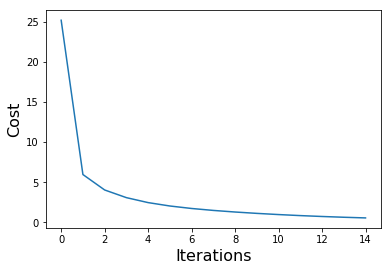

In [22]:
if __name__ == "__main__":
    '''
    Getting data
    '''
    train_data,train_label,test_data,test_label = load_data()
    iterations=15
    #print(train_data)
    hi=NeuralNetwork(train_data)
    batch_size=100
    cost=[0]*iterations
    
    for j in range (iterations):
        cost_per_batch=[]
        current_batch=0
        for i in range (len(train_data)//batch_size):
            X, Y, current_batch = take_next_batch(train_data,train_label,current_batch,batch_size)
            cost_per_batch.append(hi.train(X,Y,1,"log"))
            print("Loss in minibatch",i,":",cost_per_batch[i])
        print("----------------------------------------------------------------------------------------------------")    
        cost[j] = abs(np.mean(cost_per_batch))
        print("Loss in iteration",j,":",cost[j])
    plt.plot(cost)
    plt.xlabel('Iterations', fontsize=16)
    plt.ylabel('Cost', fontsize=16)
    plt.show()


In [23]:
var=0
for check_it in range (len(test_data)):
    ypred = np.argmax(hi.think(test_data[check_it]))
    y = np.argmax(test_label[check_it],axis=0)
    if ypred == y:
        var +=1
accuracy = 100*(var/len(test_data))
print("Testing accuracy:",accuracy)



c:\users\hp\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:34: RuntimeWarning: overflow encountered in exp


Testing accuracy: 95.32000000000001


In [ ]:
'''
The code provided with testing accurac of 92.86% on training using 5 iterations
The code provided with testing accurac of 95.32% on training using 15 iterations
'''